# Neural Network testing for Multilabel Text Data

In [33]:
import pickle
import numpy as np
import pandas as pd

In [8]:
with open('../pickles/policy_list.pckl', 'rb') as p:
    policy_list = pickle.load(p)
    
def create_target_array(policy_list):
    #for i in range(1,n+1):
    for i in policy_list:
        yield i+'_PERFORMED'
        yield i+'_NOT_PERFORMED'

policy_targets = list(create_target_array(policy_list))
#policy_targets.append('NO_POLICY_MENTIONED')
len(policy_targets)

116

In [4]:
with open('../pickles/df_nlp_no_negative_multilabel_target.pckl', 'rb') as p:
    df = pickle.load(p)

df.columns

Index(['text', 'target'], dtype='object')

In [5]:
df.head()

,text,target
0,privacy policy this privacy policy (hereafter ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1 about our products 1 1 our products offer a...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,'2 the information we collect the information...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"'2 2 in addition, we store certain information...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,(c) to remember your preferences and registrat...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [14]:
list_corpus = df['text'].tolist()
list_labels = df['target'].tolist()

print('X: {}'.format(len(list_corpus)))
print('y: {}'.format(len(list_labels)))

X: 15507
y: 15507


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [16]:
def fit_vectorizer(data, vec_type='count'):
    '''Create and fit a vectorizer
    
    Options:
    + count -> count_vectorizer 
    + tfidf -> tfidf_vectorizer
    
    Input:
    + data - X data to fit the model
    + vec_type - name of vectorizer to use
    
    Returns:
    + Document-term matrix or Tf-idf-weighted document-term matrix
    + vectorizer - fitted model
    '''
    if vec_type=='count':
        vectorizer = CountVectorizer()
    elif vec_type=='tfidf':
        vectorizer = TfidfVectorizer()
    else:
        print('Please select an appropriate option')
    
    emb = vectorizer.fit_transform(data)

    return emb, vectorizer

In [17]:
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

# vectorize word conts
X_train_counts, count_vectorizer = fit_vectorizer(X_train, vec_type='count')
X_test_counts = count_vectorizer.transform(X_test)

In [329]:
list_corpus[0]

'privacy policy this privacy policy (hereafter referred to as the "privacy    policy") is applicable to our websites, apps and to all games and other activities(hereafter    referred to as the "our products") that are offered by us on or through our products     tiny piece, having its registered office at ajeltake road, ajeltake island, majuro,    republic of the marshall island mh 96960 (hereafter referred to as "6677g")  6677g    may use affiliates\' or reputable third parties\' services for the processing of    personal data collected on or through our products  by using or accessing our    products, you are accepting the practices described in this privacy policy '

In [6]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/anaconda/envs/insight/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda/envs/insight/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda/envs/insight/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda/envs/insight/lib/python3.6/site-packages/tenso

In [25]:
list_corpus

['privacy policy this privacy policy (hereafter referred to as the "privacy    policy") is applicable to our websites, apps and to all games and other activities(hereafter    referred to as the "our products") that are offered by us on or through our products     tiny piece, having its registered office at ajeltake road, ajeltake island, majuro,    republic of the marshall island mh 96960 (hereafter referred to as "6677g")  6677g    may use affiliates\' or reputable third parties\' services for the processing of    personal data collected on or through our products  by using or accessing our    products, you are accepting the practices described in this privacy policy ',
 '1  about our products 1 1 our products offer a diverse, current, and    exciting mix of games created by 6677g, as well as games created by independent    developers and 6677g partners  players can access our products to play games without    registering  however, they may choose to register to create a public or sem

In [26]:
nn = Sequential()
nn.add(Dense(116*2, activation="relu", input_shape=(13863,)))
nn.add(Dense(116, activation="sigmoid"))

In [27]:
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
X_train_counts.shape

(12405, 13863)

In [ ]:
y_train_np = np.array(y_train)

In [43]:
nn.fit(X_train_counts.toarray(), y_train_np)

Epoch 1/10
12405/12405 [==============================] - 80s - loss: 0.0736 - acc: 0.9904    
Epoch 2/10
12405/12405 [==============================] - 78s - loss: 0.0178 - acc: 0.9957    
Epoch 3/10
12405/12405 [==============================] - 76s - loss: 0.0112 - acc: 0.9966    
Epoch 4/10
12405/12405 [==============================] - 77s - loss: 0.0080 - acc: 0.9974    
Epoch 5/10
12405/12405 [==============================] - 76s - loss: 0.0060 - acc: 0.9982    
Epoch 6/10
12405/12405 [==============================] - 76s - loss: 0.0046 - acc: 0.9986    
Epoch 7/10
12405/12405 [==============================] - 77s - loss: 0.0037 - acc: 0.9990    
Epoch 8/10
12405/12405 [==============================] - 76s - loss: 0.0029 - acc: 0.9993    
Epoch 9/10
12405/12405 [==============================] - 88s - loss: 0.0024 - acc: 0.9994    
Epoch 10/10
12405/12405 [==============================] - 81s - loss: 0.0020 - acc: 0.9995    


### How to serialize model???

In [84]:
from keras.models import load_model

In [90]:
#with open('../pickles/count_vec_for_nn.pckl', 'wb') as p:
#    pickle.dump(count_vectorizer, p, protocol=pickle.HIGHEST_PROTOCOL)

In [85]:
#with open('../pickles/nn_first_trial_model_116_class.pckl', 'wb') as p:
#    pickle.dump(nn, p, protocol=pickle.HIGHEST_PROTOCOL)
nn.save('nn_model_first_trial.h5')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
# identical to the previous one

In [86]:
nn_reloaded = load_model('nn_model_first_trial.h5')
nn_reloaded

In [46]:
y_predicted = nn.predict(X_test_counts.toarray())

In [47]:
y_predicted

array([[2.87770908e-05, 7.36305155e-05, 3.41565174e-05, ...,
        1.08058675e-05, 2.98756186e-05, 1.85941157e-04],
       [8.94761115e-07, 4.61964778e-09, 9.99308014e-08, ...,
        6.94010474e-15, 2.51306051e-06, 1.09351265e-12],
       [7.44289253e-04, 1.51752010e-05, 1.19719749e-04, ...,
        2.67973927e-08, 3.52591509e-04, 3.66935637e-07],
       ...,
       [1.95454104e-05, 2.69577782e-07, 2.78468463e-07, ...,
        2.97366382e-10, 1.95109460e-04, 6.52633902e-09],
       [4.13416181e-08, 7.92093008e-13, 1.19366730e-08, ...,
        4.02038005e-15, 3.22571594e-07, 5.16796189e-16],
       [1.28508880e-04, 1.05030404e-06, 6.34936259e-06, ...,
        2.19358043e-09, 1.84488614e-04, 3.35593228e-07]], dtype=float32)

In [54]:
sum(y_predicted>0.5)

array([ 19,   4,   1,   0,  20,   3,   1,   0,   3,   0,   0,   0, 136,
        28,   5,   2,  20,   6,   1,   1,  53,  12,   3,   0,  21,   5,
         2,   1,   4,   0,   3,   0,  12,   2,   7,   0,  24,  10,   1,
         0,  13,   5,   0,   0,  23,   4,   5,   0,   1,   0,   9,   1,
         5,   1, 134,   2,  72,   4,  46,   5,  29,   2,   7,   2,   3,
         0,   0,   0,   0,   0,  76,   8,  37,   5,   9,   4,   3,   2,
         8,   1,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,  68,
        12,  25,   3,   3,   2,   0,   1,   9,   0,   3,   0,  13,   3,
         1,   0,   9,   0,   4,   0,   6,   5,   1,   1,  39,   5])

In [57]:
sum(y_predicted>0.75)

array([ 14,   0,   1,   0,  19,   2,   0,   0,   2,   0,   0,   0, 108,
        18,   3,   0,  12,   3,   0,   1,  45,  10,   2,   0,  16,   3,
         1,   0,   3,   0,   2,   0,   7,   2,   5,   0,  19,   6,   1,
         0,  10,   4,   0,   0,  16,   3,   3,   0,   1,   0,   7,   0,
         4,   0, 110,   1,  60,   1,  34,   3,  23,   2,   5,   0,   0,
         0,   0,   0,   0,   0,  63,   3,  28,   2,   5,   0,   3,   1,
         6,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,  55,
         6,  15,   0,   1,   1,   0,   0,   6,   0,   3,   0,   9,   2,
         1,   0,   6,   0,   2,   0,   5,   2,   1,   0,  33,   4])

In [58]:
sum(y_predicted>0.25)

array([ 24,   5,   2,   0,  25,   9,   1,   0,   3,   0,   0,   0, 165,
        37,   7,   2,  30,  10,   2,   1,  75,  19,   5,   0,  25,  14,
         2,   2,   6,   3,   3,   0,  14,   5,   8,   0,  29,  14,   3,
         0,  21,   8,   1,   0,  27,   8,  10,   1,   1,   0,  11,   3,
        12,   1, 162,   2,  95,   7,  57,  11,  36,   4,  10,   2,   3,
         0,   0,   0,   0,   0,  92,  16,  45,  11,  15,   5,   6,   4,
        11,   1,   0,   1,   3,   0,   0,   0,   0,   0,   0,   0,  90,
        18,  33,   7,   5,   4,   1,   1,  12,   0,   4,   0,  18,   6,
         3,   1,   9,   1,   4,   0,  10,   6,   3,   2,  52,   7])

In [56]:
sum(y_test)

array([ 33.,   5.,   4.,   0.,  39.,   9.,   2.,   0.,  10.,   0.,   2.,
         0., 179.,  44.,  20.,   9.,  35.,  10.,   1.,   0.,  88.,  36.,
         8.,   8.,  47.,  21.,   6.,   6.,  15.,   3.,   8.,   1.,  30.,
         4.,  14.,   2.,  46.,  13.,   8.,   2.,  32.,   9.,   7.,   1.,
        35.,   8.,  14.,   2.,   4.,   2.,  23.,   9.,  17.,   5., 173.,
        10.,  92.,   9.,  64.,  19.,  29.,   8.,   9.,   6.,   5.,   4.,
         2.,   1.,   0.,   0.,  94.,  26.,  40.,  11.,  12.,   8.,   7.,
         5.,  17.,   4.,   0.,   0.,   6.,   1.,   0.,   1.,   0.,   1.,
         2.,   0., 110.,  36.,  34.,  10.,  13.,   7.,   6.,   1.,  14.,
         6.,   7.,   3.,  31.,   9.,   8.,   2.,  17.,   4.,   8.,   2.,
        21.,   9.,   8.,   2.,  46.,   8.])

### Try on out of sample

In [59]:
import urllib
from bs4 import BeautifulSoup

In [62]:
def get_html_from_url(url):
    html = urllib.request.urlopen(url).read()
    return html

def get_sentences_from_html(html):
    '''
    Clean-up raw html
    return a list of sentences
    '''
    soup = BeautifulSoup(html, 'html.parser')
    
    # kill all script and style elements
    for script in soup(['script', 'style']):
        script.decompose()    

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    sentences_all = text.split('\n')
    sentences = [sen for sen in sentences_all if len(sen)>100]
    
    return sentences

def standardize_text(df, text_field):
    '''Clean-up text column to prepare for tokenization
    
    Removes unwanted characters &
    Replaces them with spaces or blanks
    --
    Input
    + pandas dataframe
    + name of text column
    
    Returns
    + pandas dataframe with cleaned column
    '''
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [61]:
seriously_policy = get_html_from_url('http://www.seriously.com/privacy-notice/')
seriously_sentences = get_sentences_from_html(seriously_policy)
len(seriously_sentences)

41

In [63]:
seriously_sentences

['Seriously respects your right to privacy.\xa0 This Privacy Notice explains who we are, how we collect, share and use personal information about you, and how you can exercise your privacy rights. This Privacy Notice applies to personal information that we collect through our games (“Games“) and website at https://bestfiends.com/ (“Website“) (together “Services”).',
 'If you have any questions or concerns about our use of your personal information, then please contact us using the contact details provided at the bottom of this Privacy Notice.',
 'We recommend that you read this Privacy Notice in full to ensure you are fully informed.\xa0 However, if you only want to access a particular section of this Privacy Notice, then you can click on the relevant link below to jump to that section.',
 'Seriously is a game development studio with offices in Helsinki, Finland and Los Angeles, CA, United States.',
 'For more information about Seriously, please see the Company section of our Website a

In [67]:
#df_oos = pd.DataFrame(seriously_sentences,columns=['text'])
#df_oos = standardize_text(df_oos, 'text')
#oos_list = df_oos['text'].tolist()

In [69]:
oos_list[0]

'seriously respects your right to privacy   this privacy notice explains who we are, how we collect, share and use personal information about you, and how you can exercise your privacy rights  this privacy notice applies to personal information that we collect through our games ( games ) and website at  ( website ) (together  services ) '

In [70]:
df_oos = pd.DataFrame(seriously_sentences,columns=['text'])
df_oos = standardize_text(df_oos, 'text')
oos_list = df_oos['text'].tolist()
X_oos = count_vectorizer.transform(oos_list)

In [71]:
X_oos

<41x13863 sparse matrix of type '<class 'numpy.int64'>'
	with 1339 stored elements in Compressed Sparse Row format>

In [74]:
y_oos = nn.predict(X_oos.toarray())

In [82]:
practiced_policies = sum(y_oos>0.5)
practiced_policies

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [81]:
policy_indices = {}
i = 0 
for pol in policy_targets:
    policy_indices[pol] = i
    i+=1
policy_indices['Contact_1stParty_PERFORMED']

0

In [92]:
#with open('../pickles/nn_models/policy_indices.pckl', 'wb') as p:
#    pickle.dump(policy_indices, p, protocol=pickle.HIGHEST_PROTOCOL)

In [91]:
policy_indices

{'Contact_1stParty_PERFORMED': 0,
 'Contact_1stParty_NOT_PERFORMED': 1,
 'Contact_3rdParty_PERFORMED': 2,
 'Contact_3rdParty_NOT_PERFORMED': 3,
 'Contact_Address_Book_1stParty_PERFORMED': 4,
 'Contact_Address_Book_1stParty_NOT_PERFORMED': 5,
 'Contact_Address_Book_3rdParty_PERFORMED': 6,
 'Contact_Address_Book_3rdParty_NOT_PERFORMED': 7,
 'Contact_City_1stParty_PERFORMED': 8,
 'Contact_City_1stParty_NOT_PERFORMED': 9,
 'Contact_City_3rdParty_PERFORMED': 10,
 'Contact_City_3rdParty_NOT_PERFORMED': 11,
 'Contact_E_Mail_Address_1stParty_PERFORMED': 12,
 'Contact_E_Mail_Address_1stParty_NOT_PERFORMED': 13,
 'Contact_E_Mail_Address_3rdParty_PERFORMED': 14,
 'Contact_E_Mail_Address_3rdParty_NOT_PERFORMED': 15,
 'Contact_Password_1stParty_PERFORMED': 16,
 'Contact_Password_1stParty_NOT_PERFORMED': 17,
 'Contact_Password_3rdParty_PERFORMED': 18,
 'Contact_Password_3rdParty_NOT_PERFORMED': 19,
 'Contact_Phone_Number_1stParty_PERFORMED': 20,
 'Contact_Phone_Number_1stParty_NOT_PERFORMED': 21,
 '

In [83]:
for pol in policy_indices:
    if practiced_policies[policy_indices[pol]] > 0:
        print(pol)

Contact_E_Mail_Address_1stParty_PERFORMED
Contact_Postal_Address_1stParty_PERFORMED
Identifier_Device_ID_1stParty_PERFORMED
Identifier_IP_Address_1stParty_PERFORMED
Location_1stParty_PERFORMED
Location_Cell_Tower_1stParty_PERFORMED
Location_IP_Address_1stParty_PERFORMED
SSO_PERFORMED


## Performance Metrics

+ evaluate accuracy, precision, recall, f1
+ evaluate these at various sigmoid value cutoffs (0.25, 0.5, 0.75)

**COMPARE:** y_test & y_predicted

In [95]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
(y_predicted[0]>0.5) == y_test[0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [117]:
result_thres_05 = ((y_predicted>0.5)==y_test)
result_thres_05

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [129]:
result_thres_05.shape

(3102, 116)

In [141]:
result_thres_05*1

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [134]:
len(result_thres_05[:,1])

3102

**Accuracy**

In [139]:
from keras.metrics import binary_accuracy

In [136]:
sum(result_thres_05[:,1])/len(result_thres_05[:,1])

0.998388136686009

In [273]:
result_thres_05

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [138]:
sum(result_thres_05)/3102

array([0.99097357, 0.99838814, 0.99903288, 1.        , 0.99323017,
       0.99806576, 0.99967763, 1.        , 0.99709865, 1.        ,
       0.99935525, 1.        , 0.96615087, 0.99097357, 0.99194068,
       0.99709865, 0.99323017, 0.99677627, 0.99935525, 0.99967763,
       0.98291425, 0.99161831, 0.9964539 , 0.99742102, 0.98774984,
       0.99484204, 0.99742102, 0.99838814, 0.99580916, 0.99903288,
       0.99774339, 0.99967763, 0.99355255, 0.99871051, 0.9964539 ,
       0.99935525, 0.99032882, 0.99774339, 0.99709865, 0.99935525,
       0.99194068, 0.99806576, 0.99774339, 0.99967763, 0.99097357,
       0.99871051, 0.99451966, 0.99935525, 0.99903288, 0.99935525,
       0.99419729, 0.99742102, 0.99613153, 0.99806576, 0.97259832,
       0.99742102, 0.9858156 , 0.99774339, 0.98388137, 0.99548678,
       0.99419729, 0.99806576, 0.99742102, 0.99871051, 0.99871051,
       0.99871051, 0.99935525, 0.99967763, 1.        , 1.        ,
       0.98259188, 0.99419729, 0.99129594, 0.99742102, 0.99580

In [272]:
len(result_thres_05)

3102

In [146]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [153]:
y_thres_05 = (y_predicted>0.5)*1
y_thres_05[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [228]:
y_thres_05

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [176]:
yt_samp = np.array([1,0,0,1,0,1,1,0])
yp_samp = np.array([1,0,1,0,0,1,0,1])

In [226]:
((yt_samp==yp_samp) & (yt_samp==1))*1 # true positive -- this is fine

array([1, 0, 0, 0, 0, 1, 0, 0])

In [225]:
((yt_samp!=yp_samp) & (yt_samp==1))*1 # FALSE NEGATIVE -- correct

array([0, 0, 0, 1, 0, 0, 1, 0])

In [224]:
((yt_samp!=yp_samp) & (yp_samp==1))*1 # false positive -- correct

array([0, 0, 1, 0, 0, 0, 0, 1])

In [223]:
((yt_samp==yp_samp) & (yp_samp==0))*1 # true negative

array([0, 1, 0, 0, 1, 0, 0, 0])

**Precision**

tp/(tp+fp)

In [255]:
yt_samp==1

array([ True, False, False,  True, False,  True,  True, False])

In [261]:
y_test==1

False

In [259]:
y_test_np = np.array(y_test)

In [262]:
y_test_np == 1

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [263]:
tp = ((y_test_np==y_thres_05) & (y_test_np==1))*1
tn = ((y_test_np==y_thres_05) & (y_thres_05==0))*1
fp = ((y_test_np!=y_thres_05) & (y_thres_05==1))*1
fn = ((y_test_np!=y_thres_05) & (y_test_np==1))*1

In [276]:
((y_predicted>0.5)==y_test)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [309]:
def get_keras_metrics(y_test, y_predicted, threshold=0.5):
    # prepare targets
    y_threshold = (y_predicted>threshold)*1
    y_test_np = np.array(y_test)
    acc_result = ((y_predicted>threshold)==y_test)
    
    # get classification counts
    tp = ((y_test_np==y_threshold) & (y_test_np==1))*1
    tn = ((y_test_np==y_threshold) & (y_threshold==0))*1
    fp = ((y_test_np!=y_threshold) & (y_threshold==1))*1
    fn = ((y_test_np!=y_threshold) & (y_test_np==1))*1
    
    # metrics
    accuracy = sum(acc_result)/len(acc_result)
    precision = sum(tp)/(sum(tp)+sum(fp))
    recall = sum(tp)/(sum(tp)+sum(fn))
    f1_score = (2*sum(tp))/((2*sum(tp))+sum(fp)+sum(fn))
    tpr = sum(tp)/(sum(tp)+sum(fn))
    fpr = sum(fp)/(sum(fp)+sum(tn))
    
    return accuracy, precision, recall, f1_score, tpr, fpr

In [282]:
accuracy, precision, recall, f1_score = get_keras_metrics(y_test, y_predicted, threshold=0.5)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [310]:
metrics_01 = get_keras_metrics(y_test, y_predicted, threshold=0.1)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [318]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [320]:
a = [1]
a.append(np.nanmean(metrics_01[4]))
a

[1, 0.425800392926121]

In [323]:
def generate_roc_values(y_test, y_predicted):
    #thres_values = np.linspace(0,1,11)
    thres_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    tpr_list = []
    fpr_list = []
    for i in thres_values:
        tmp_metrics = get_keras_metrics(y_test, y_predicted, threshold=i)
        tpr_list.append(np.nanmean(tmp_metrics[4]))
        fpr_list.append(np.nanmean(tmp_metrics[5]))
    
    return tpr_list, fpr_list

In [325]:
tpr_list, fpr_list = generate_roc_values(y_test, y_predicted)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
uni_bi_tpr = [0.336963400108884, 0.29451663884045287, 0.2579691735050892, 0.24287849845501708, 0.22385614315595206, 0.20699589240151595, 0.18748584915989033, 0.16637182077566876, 0.1488914476633685]
uni_bi_fpr = [0.002309536480589447, 0.001683927568579401, 0.0013375116805062015, 0.0011022361833467383, 0.000923052717412954, 0.0008211416147136751, 0.0006841556525547175, 0.0005279987723152441, 0.0004029240265681355]
max_tpr = [0.40713433617510797, 0.34381777451042184, 0.3125283213127969, 0.29252921827068773, 0.26624615785414946, 0.24281386463434082, 0.21518118807631748, 0.18858902871489505, 0.15687109602456045]
max_fpr = [0.002507928748962294, 0.0017781651732514025, 0.001335689626240129, 0.0010943489310551232, 0.0009348118982703104, 0.0008095356761380428, 0.0006708307632427478, 0.0005195202538722488, 0.0003714546884194708]
stop_fpr = [0.3576140796184367, 0.2985292200407161, 0.2683625394948941, 0.24771829768763076, 0.21910884798716965, 0.20220029390115668, 0.18281575324121757, 0.15651549494731057, 0.12341725428374398]
stop_tpr = [0.0027889149662778698, 0.002136990489553581, 0.001757259662119525, 0.001476930566659862, 0.001315517456526563, 0.0011654896303815979, 0.0009956500731645892, 0.0007718940714156431, 0.0005168926649513284]
tfidf_tpr = [0.42598654258768626, 0.33011522549890476, 0.2672340387477744, 0.2344278393365655, 0.20016815535314103, 0.17854123285703682, 0.14047283383828352, 0.10471168256277141, 0.0658636721048241]
tfidf_fpr = [0.0029151071241229555, 0.001644637151720663, 0.00109840944071349, 0.0008068872927501593, 0.0005676122460611141, 0.0004198024943445616, 0.00029459333257404985, 0.00020610197687132888, 0.00010376530243492242]

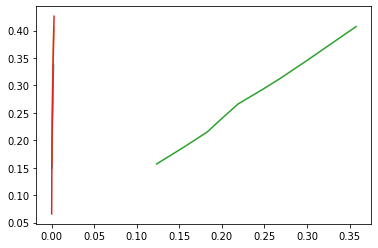

In [4]:
plt.figure()
plt.plot(uni_bi_fpr, uni_bi_tpr)
plt.plot(max_fpr, max_tpr)
plt.plot(stop_fpr, max_tpr)
plt.plot(tfidf_fpr, tfidf_tpr)

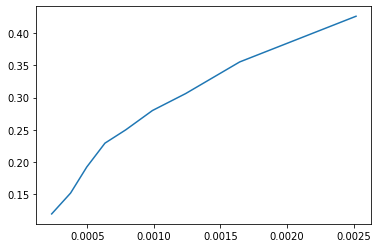

In [328]:
plt.plot(fpr_list, tpr_list)

In [311]:
len(metrics_01)

6

In [313]:
tpos_rate = np.nanmean(metrics_01[4])
tpos_rate

0.425800392926121

In [314]:
fpos_rate = np.nanmean(metrics_01[5])
fpos_rate

0.002517845822703013

In [298]:
metrics_01[3]

array([0.48648649, 0.33333333, 0.25      , 0.        , 0.74285714,
       0.63157895, 0.5       ,        nan, 0.42857143, 0.        ,
       0.        ,        nan, 0.66315789, 0.70833333, 0.0625    ,
       0.15384615, 0.60273973, 0.48      , 0.        , 0.        ,
       0.66304348, 0.60606061, 0.125     , 0.        , 0.54545455,
       0.66666667, 0.        , 0.5       , 0.27272727, 0.57142857,
       0.36363636, 0.        , 0.6122449 , 0.6       , 0.57142857,
       0.        , 0.68235294, 0.6875    , 0.        , 0.        ,
       0.6440678 , 0.60869565, 0.        , 0.        , 0.58823529,
       0.73684211, 0.20689655, 0.        , 0.16666667, 0.        ,
       0.61904762, 0.625     , 0.5       , 0.25      , 0.74366197,
       0.75      , 0.68224299, 0.63636364, 0.58208955, 0.59459459,
       0.66666667, 0.44444444, 0.63636364, 0.5       , 0.5       ,
       0.        , 0.        , 0.        ,        nan,        nan,
       0.66009852, 0.78431373, 0.54      , 0.56      , 0.42857

In [ ]:
build_roc

In [299]:
metrics_025 = get_keras_metrics(y_test, y_predicted, threshold=0.25)
metrics_05 = get_keras_metrics(y_test, y_predicted, threshold=0.5)
metrics_075 = get_keras_metrics(y_test, y_predicted, threshold=0.75)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [304]:
np.mean(metrics_025[0])

0.9959425509682295

0.24991206264701782

In [292]:
metrics_05[0][2]

array([0.36363636, 0.4       , 0.25      ,        nan, 0.48717949,
       0.33333333, 0.5       ,        nan, 0.2       ,        nan,
       0.        ,        nan, 0.58659218, 0.5       , 0.        ,
       0.11111111, 0.48571429, 0.3       , 0.        ,        nan,
       0.5       , 0.30555556, 0.        , 0.        , 0.31914894,
       0.23809524, 0.        , 0.16666667, 0.2       , 0.        ,
       0.25      , 0.        , 0.36666667, 0.25      , 0.35714286,
       0.        , 0.43478261, 0.61538462, 0.        , 0.        ,
       0.3125    , 0.44444444, 0.        , 0.        , 0.42857143,
       0.5       , 0.07142857, 0.        , 0.25      , 0.        ,
       0.30434783, 0.11111111, 0.29411765, 0.        , 0.6416185 ,
       0.2       , 0.65217391, 0.33333333, 0.46875   , 0.26315789,
       0.68965517, 0.25      , 0.44444444, 0.33333333, 0.4       ,
       0.        , 0.        , 0.        ,        nan,        nan,
       0.61702128, 0.30769231, 0.625     , 0.36363636, 0.33333

In [280]:
precision

array([0.63157895, 0.5       , 1.        ,        nan, 0.95      ,
       1.        , 1.        ,        nan, 0.66666667,        nan,
              nan,        nan, 0.77205882, 0.78571429, 0.        ,
       0.5       , 0.85      , 0.5       , 0.        , 0.        ,
       0.83018868, 0.91666667, 0.        ,        nan, 0.71428571,
       1.        , 0.        , 1.        , 0.75      ,        nan,
       0.66666667,        nan, 0.91666667, 0.5       , 0.71428571,
              nan, 0.83333333, 0.8       , 0.        ,        nan,
       0.76923077, 0.8       ,        nan,        nan, 0.65217391,
       1.        , 0.2       ,        nan, 1.        ,        nan,
       0.77777778, 1.        , 1.        , 0.        , 0.82835821,
       1.        , 0.83333333, 0.75      , 0.65217391, 1.        ,
       0.68965517, 1.        , 0.57142857, 1.        , 0.66666667,
              nan,        nan,        nan,        nan,        nan,
       0.76315789, 1.        , 0.67567568, 0.8       , 0.44444

In [267]:
sum(tp)

array([ 12,   2,   1,   0,  19,   3,   1,   0,   2,   0,   0,   0, 105,
        22,   0,   1,  17,   3,   0,   0,  44,  11,   0,   0,  15,   5,
         0,   1,   3,   0,   2,   0,  11,   1,   5,   0,  20,   8,   0,
         0,  10,   4,   0,   0,  15,   4,   1,   0,   1,   0,   7,   1,
         5,   0, 111,   2,  60,   3,  30,   5,  20,   2,   4,   2,   2,
         0,   0,   0,   0,   0,  58,   8,  25,   4,   4,   4,   2,   0,
         6,   1,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,  57,
         8,  15,   2,   2,   2,   0,   0,   6,   0,   3,   0,  10,   3,
         1,   0,   8,   0,   3,   0,   4,   4,   1,   0,  25,   4])

In [268]:
sum(fp)

array([ 7,  2,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0, 31,  6,  5,  1,  3,
        3,  1,  1,  9,  1,  3,  0,  6,  0,  2,  0,  1,  0,  1,  0,  1,  1,
        2,  0,  4,  2,  1,  0,  3,  1,  0,  0,  8,  0,  4,  0,  0,  0,  2,
        0,  0,  1, 23,  0, 12,  1, 16,  0,  9,  0,  3,  0,  1,  0,  0,  0,
        0,  0, 18,  0, 12,  1,  5,  0,  1,  2,  2,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0, 11,  4, 10,  1,  1,  0,  0,  1,  3,  0,  0,  0,
        3,  0,  0,  0,  1,  0,  1,  0,  2,  1,  0,  1, 14,  1])

In [242]:
sum(y_thres_05)

array([ 19,   4,   1,   0,  20,   3,   1,   0,   3,   0,   0,   0, 136,
        28,   5,   2,  20,   6,   1,   1,  53,  12,   3,   0,  21,   5,
         2,   1,   4,   0,   3,   0,  12,   2,   7,   0,  24,  10,   1,
         0,  13,   5,   0,   0,  23,   4,   5,   0,   1,   0,   9,   1,
         5,   1, 134,   2,  72,   4,  46,   5,  29,   2,   7,   2,   3,
         0,   0,   0,   0,   0,  76,   8,  37,   5,   9,   4,   3,   2,
         8,   1,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,  68,
        12,  25,   3,   3,   2,   0,   1,   9,   0,   3,   0,  13,   3,
         1,   0,   9,   0,   4,   0,   6,   5,   1,   1,  39,   5])

In [269]:
sum(tp)/(sum(tp)+sum(fp))
#tp/(tp+fp)

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.63157895, 0.5       , 1.        ,        nan, 0.95      ,
       1.        , 1.        ,        nan, 0.66666667,        nan,
              nan,        nan, 0.77205882, 0.78571429, 0.        ,
       0.5       , 0.85      , 0.5       , 0.        , 0.        ,
       0.83018868, 0.91666667, 0.        ,        nan, 0.71428571,
       1.        , 0.        , 1.        , 0.75      ,        nan,
       0.66666667,        nan, 0.91666667, 0.5       , 0.71428571,
              nan, 0.83333333, 0.8       , 0.        ,        nan,
       0.76923077, 0.8       ,        nan,        nan, 0.65217391,
       1.        , 0.2       ,        nan, 1.        ,        nan,
       0.77777778, 1.        , 1.        , 0.        , 0.82835821,
       1.        , 0.83333333, 0.75      , 0.65217391, 1.        ,
       0.68965517, 1.        , 0.57142857, 1.        , 0.66666667,
              nan,        nan,        nan,        nan,        nan,
       0.76315789, 1.        , 0.67567568, 0.8       , 0.44444

**Recall**

tp/(tp+fn)

In [270]:
sum(tp)/(sum(tp)+sum(fn))

/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.36363636, 0.4       , 0.25      ,        nan, 0.48717949,
       0.33333333, 0.5       ,        nan, 0.2       ,        nan,
       0.        ,        nan, 0.58659218, 0.5       , 0.        ,
       0.11111111, 0.48571429, 0.3       , 0.        ,        nan,
       0.5       , 0.30555556, 0.        , 0.        , 0.31914894,
       0.23809524, 0.        , 0.16666667, 0.2       , 0.        ,
       0.25      , 0.        , 0.36666667, 0.25      , 0.35714286,
       0.        , 0.43478261, 0.61538462, 0.        , 0.        ,
       0.3125    , 0.44444444, 0.        , 0.        , 0.42857143,
       0.5       , 0.07142857, 0.        , 0.25      , 0.        ,
       0.30434783, 0.11111111, 0.29411765, 0.        , 0.6416185 ,
       0.2       , 0.65217391, 0.33333333, 0.46875   , 0.26315789,
       0.68965517, 0.25      , 0.44444444, 0.33333333, 0.4       ,
       0.        , 0.        , 0.        ,        nan,        nan,
       0.61702128, 0.30769231, 0.625     , 0.36363636, 0.33333

**F1 Score**

2 x TP / (2 x TP + FP + FN)

In [ ]:
f1s = (2*sum(tp))/((2*sum(tp))+sum(fp)+sum(fn))
f1s

In [126]:
len(y_test)

3102

In [124]:
result_thres_05[6,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [114]:
y_predicted[1,:].shape

(116,)

In [113]:
y_predicted[:1].shape

(1, 116)

In [109]:
y_predicted.shape

(3102, 116)